## Instalação de dependências externas necessárias

In [ ]:
%pip install pandas -q
%pip install matplotlib -q
#%pip install pandas-profiling
%pip install seaborn
%pip install numpy
%pip install -U scikit-learn
%pip install yellowbrick
%pip install lightgbm
%pip install imblearn
%pip install lime
%pip install shap

In [32]:
# %pip install conda install -c conda-forge pandas-profiling=2.6.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carregamento das dependências

In [176]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', 1000)
import sqlite3
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import lime
import lime.lime_tabular
import shap



In [ ]:
# !pip install -U pandas-profiling
# from pandas_profiling import ProfileReport

## Importação do dataset e criação de DB

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/LSouzaAndrade/TechChallenge3/refs/heads/main/Datasets/StudentPerformanceFactors.csv')
conn = sqlite3.connect('./Datasets/StudentPerformanceFactors.db')
# dataset.to_sql('StudentData', conn, if_exists='replace', index=False)
# conn.close()

### Data Cleaning

In [8]:
df.shape

(6607, 20)

## Features com valores unicos
Verificando a existência de features com valores únicos (devem ser dropadas por não contribuirem para a explicar a variação da feature target)

In [9]:
df.nunique().sort_values()

Extracurricular_Activities     2
Internet_Access                2
Gender                         2
School_Type                    2
Learning_Disabilities          2
Distance_from_Home             3
Parental_Involvement           3
Access_to_Resources            3
Parental_Education_Level       3
Motivation_Level               3
Family_Income                  3
Teacher_Quality                3
Peer_Influence                 3
Sleep_Hours                    7
Physical_Activity              7
Tutoring_Sessions              9
Hours_Studied                 41
Attendance                    41
Exam_Score                    45
Previous_Scores               51
dtype: int64

### NaN Analysis

In [10]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [12]:
df["Parental_Education_Level"].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [13]:
df["Teacher_Quality"].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [14]:
df["Distance_from_Home"].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [16]:
df = df.dropna(subset=["Parental_Education_Level", "Teacher_Quality", "Distance_from_Home"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

## Ajuste do dtypes

In [19]:
df = df.convert_dtypes()
df.dtypes

Hours_Studied                          Int64
Attendance                             Int64
Parental_Involvement          string[python]
Access_to_Resources           string[python]
Extracurricular_Activities    string[python]
Sleep_Hours                            Int64
Previous_Scores                        Int64
Motivation_Level              string[python]
Internet_Access               string[python]
Tutoring_Sessions                      Int64
Family_Income                 string[python]
Teacher_Quality               string[python]
School_Type                   string[python]
Peer_Influence                string[python]
Physical_Activity                      Int64
Learning_Disabilities         string[python]
Parental_Education_Level      string[python]
Distance_from_Home            string[python]
Gender                        string[python]
Exam_Score                             Int64
dtype: object

## Estatística Básica

### Variáveis Numéricas


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6378.0,19.977109,5.98546,1.0,16.0,20.0,24.0,44.0
Attendance,6378.0,80.020853,11.550723,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6378.0,7.034964,1.468033,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6378.0,75.066165,14.400389,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6378.0,1.495296,1.233984,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6378.0,2.972719,1.028926,0.0,2.0,3.0,4.0,6.0
Exam_Score,6378.0,67.252117,3.914217,55.0,65.0,67.0,69.0,101.0


### Variáveis Categóricas

In [77]:
df.describe(include = 'string')

,Access_to_Resources,Distance_from_Home,Extracurricular_Activities,Family_Income,Gender,Internet_Access,Learning_Disabilities,Motivation_Level,Parental_Education_Level,Parental_Involvement,Peer_Influence,School_Type,Teacher_Quality
count,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
unique,3,3,2,3,2,2,2,3,3,3,3,2,3
top,Medium,Near,Yes,Low,Male,Yes,No,Medium,High School,Medium,Positive,Public,Medium
freq,3204,3801,3807,2582,3688,5893,5710,3237,3159,3251,2553,4434,3826


In [22]:
df.Parental_Involvement.value_counts(normalize = True)

Parental_Involvement
Medium    0.509721
High      0.287865
Low       0.202415
Name: proportion, dtype: Float64

In [23]:
df.Access_to_Resources.value_counts(normalize = True)

Access_to_Resources
Medium    0.502352
High      0.297899
Low       0.199749
Name: proportion, dtype: Float64

In [24]:
df.Extracurricular_Activities.value_counts(normalize = True)

Extracurricular_Activities
Yes    0.596896
No     0.403104
Name: proportion, dtype: Float64

In [25]:
df.Motivation_Level.value_counts(normalize = True)

Motivation_Level
Medium    0.507526
Low       0.292255
High       0.20022
Name: proportion, dtype: Float64

In [26]:
df.Internet_Access.value_counts(normalize = True)

Internet_Access
Yes    0.923957
No     0.076043
Name: proportion, dtype: Float64

In [27]:
df.Family_Income.value_counts(normalize = True)
df.Teacher_Quality.value_counts(normalize = True)
df.School_Type.value_counts(normalize = True)

df.Peer_Influence.value_counts(normalize = True)
df.Learning_Disabilities.value_counts(normalize = True)
df.Parental_Education_Level.value_counts(normalize = True)

df.Distance_from_Home.value_counts(normalize = True)
df.Gender.value_counts(normalize = True)

Gender
Male      0.578238
Female    0.421762
Name: proportion, dtype: Float64

# EDA utilizando Pandas

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted']

Dropar essa variavel do caraio

In [50]:
# df.rename(columns={'Exam_Score':'z_Exam_Score'},inplace = True)
cols = df.columns.sort_values()
df = df[cols]
#df.rename(columns={'z_Exam_Score':'Exam_Score'},inplace = True)

df.columns

Index(['Access_to_Resources', 'Attendance', 'Distance_from_Home',
       'Extracurricular_Activities', 'Family_Income', 'Gender',
       'Hours_Studied', 'Internet_Access', 'Learning_Disabilities',
       'Motivation_Level', 'Parental_Education_Level', 'Parental_Involvement',
       'Peer_Influence', 'Physical_Activity', 'Previous_Scores', 'School_Type',
       'Sleep_Hours', 'Teacher_Quality', 'Tutoring_Sessions', 'Exam_Score'],
      dtype='object')

<AxesSubplot:ylabel='Count'>

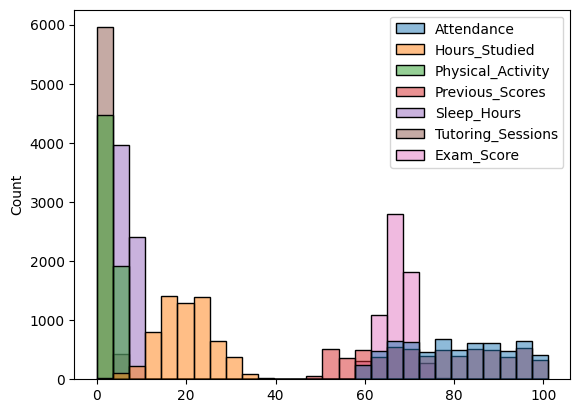

In [57]:
# fig, axes = plt.subplots(5, 5, figsize=(25, 16), sharey=False)
# fig.suptitle('Exam_Score Analysis')

sns.histplot(data=df)


ValueError: num must be 1 <= num <= 4, not 5

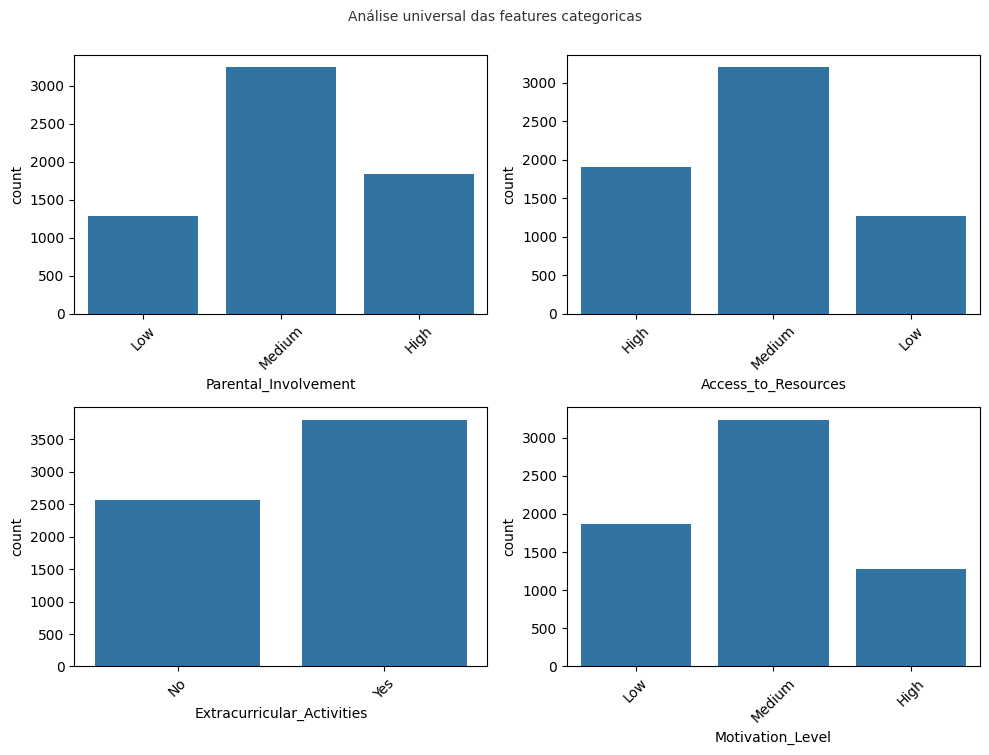

In [67]:
plt.figure(figsize=(10,7.5))
plt.suptitle("Análise universal das features categoricas", 
             fontsize=10,
             alpha=0.8,
             y=1.)
cat1 = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level","Internet_Access","Family_Income","Teacher_Quality","School_Type","Peer_Influence","Learning_Disabilities","Parental_Education_Level","Distance_from_Home","Gender"]

for i in range(len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


In [68]:
df.duplicated().sum()

0

<AxesSubplot:>

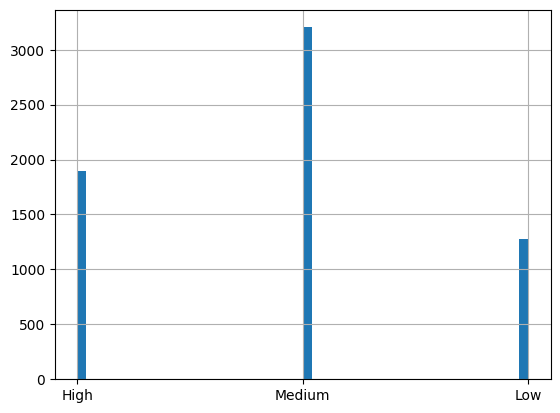

In [71]:
df['Access_to_Resources'].hist(bins=50)

<AxesSubplot:>

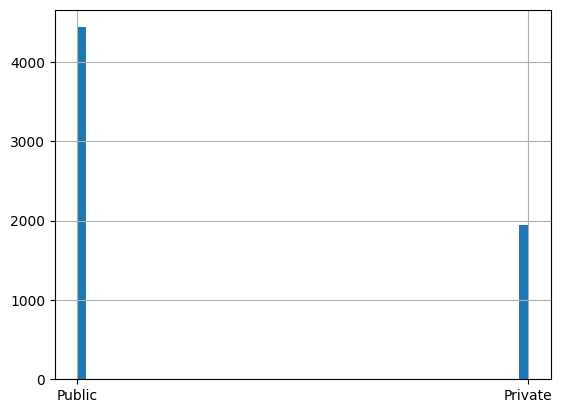

In [72]:
df['School_Type'].hist(bins=50)


### De acordo com os gráficos abaixo percebemos que tanto os alunos das escola pública como das escolas pariculares tiveram boas notas no exame.
### Entretando os alunos da escola particular possuem notas maiores no exame

<AxesSubplot:xlabel='School_Type', ylabel='Exam_Score'>

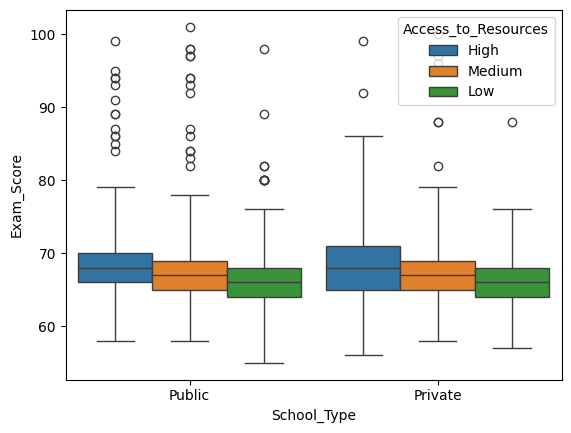

In [104]:
sns.boxplot(data=df, x="School_Type", y="Exam_Score", hue="Access_to_Resources", saturation=0.75, fill=True, dodge='auto', width=0.9,whis=2.5, linecolor='auto')

<AxesSubplot:xlabel='Distance_from_Home', ylabel='Exam_Score'>

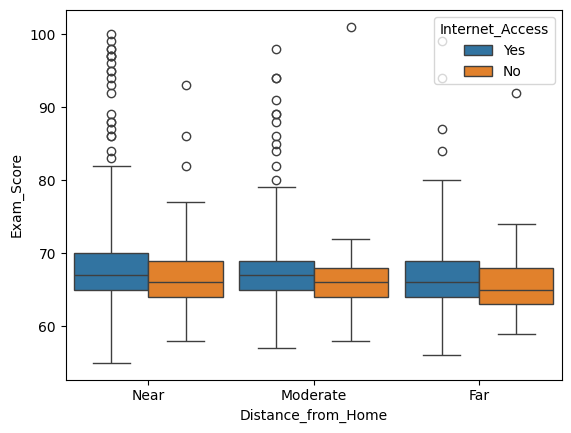

In [107]:
sns.boxplot(data=df, x="Distance_from_Home", y="Exam_Score", hue="Internet_Access", saturation=0.75, fill=True, dodge='auto', width=0.9,whis=2.5, linecolor='auto')

#### Podemos ver que o acesso à internet não influencia muito nas notas do exame :)

### Preparação do dataset para a modelagem

#### Dummizando as features categóricas

In [120]:
X = df.drop('Exam_Score', axis = 1)
y = df['Exam_Score']

cols_string = X.select_dtypes(include = 'string').columns

X = pd.get_dummies(X, columns = cols_string, drop_first = True).convert_dtypes()
X.head()

,Attendance,Hours_Studied,Physical_Activity,Previous_Scores,Sleep_Hours,Tutoring_Sessions,Access_to_Resources_Low,Access_to_Resources_Medium,Distance_from_Home_Moderate,Distance_from_Home_Near,...,Motivation_Level_Medium,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Parental_Involvement_Low,Parental_Involvement_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,School_Type_Public,Teacher_Quality_Low,Teacher_Quality_Medium
0,84,23,3,73,7,0,False,False,False,True,...,False,True,False,True,False,False,True,True,False,True
1,64,19,4,59,8,2,False,True,True,False,...,False,False,False,True,False,False,False,True,False,True
2,98,24,4,91,7,2,False,True,False,True,...,True,False,True,False,True,True,False,True,False,True
3,89,29,4,98,8,1,False,True,True,False,...,True,True,False,True,False,False,False,True,False,True
4,92,19,4,65,6,3,False,True,False,True,...,True,False,False,False,True,True,False,True,False,False


### TRAIN TEST SPLIT

In [122]:
# Train Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(4464, 27)
(4464,)
(1914, 27)
(1914,)


* A partir daqui serão testados diferentes modelos com diferentes combinações de hiperparâmetros para verificar qual apresenta melhor métrica de classificação.

In [123]:
modelo = []
precisao = []
recall = []
auc = []
df_comp = pd.DataFrame({'modelo': modelo, 'precisao':precisao, 'recall':recall, 'auc': auc})


def append_tab(ytest, ypred):
  '''
  Função para inserir métricas de classificação de cada modelo testado
  em uma tabela comparativa, ordenada pelo maior AUC.

  ARGS:
  ytest: valores reais da feature target ('Response') armazenadas no objeto ytest
  ypred: valores preditos pelo ML para a feature target ('Response') armazenadas no objeto ypred
  '''
  global modelo
  global precisao
  global recall
  global auc
  global df_comp

  modelo.append(mod)
  precisao.append(precision_score(ytest, ypred))
  recall.append(recall_score(ytest, ypred))
  auc.append(roc_auc_score(ytest, ypred))
  df_comp = pd.DataFrame({'modelo': modelo,
                        'auc': auc,
                        'precisao': precisao,
                        'recall': recall
                        })
  df_comp = df_comp.sort_values('auc', ascending = False)
  return df_comp


#### Modelo 01 - Decision TREE

#### DT - Sem balanceamento e sem pruning

In [137]:
%%time
#instanciando o modelo
mdl_dt = DecisionTreeClassifier()

#treinando o modelo
mdl_dt.fit(Xtrain, ytrain)

#predict
ypred_dt_train = mdl_dt.predict(Xtrain)
ypred_dt_test = mdl_dt.predict(Xtest)

#metricas
print('Predict no df_train:')
print(classification_report(ytrain, ypred_dt_train))
# print('\nPredict no df_test:')
# print(classification_report(ytest, ypred_dt_test))

# #Alimentando a tabela comparativa
# mod = 'DT - Sem balanceamento, Sem pruning'
# df_comp = append_tab(ytest, ypred_dt_test)

Predict no df_train:
              precision    recall  f1-score   support

          57       1.00      1.00      1.00         4
          58       1.00      1.00      1.00        13
          59       1.00      1.00      1.00        27
          60       1.00      1.00      1.00        54
          61       1.00      1.00      1.00       117
          62       1.00      1.00      1.00       186
          63       1.00      1.00      1.00       239
          64       1.00      1.00      1.00       333
          65       1.00      1.00      1.00       448
          66       1.00      1.00      1.00       499
          67       1.00      1.00      1.00       506
          68       1.00      1.00      1.00       519
          69       1.00      1.00      1.00       408
          70       1.00      1.00      1.00       381
          71       1.00      1.00      1.00       273
          72       1.00      1.00      1.00       210
          73       1.00      1.00      1.00        90
      

#### Este primeiro modelo apresenta claros sinais de overfitting, já que a precisao no treino foi = 1.0 e no test = 0.47. Isso ocorreu por não especificarmos qualquer hiperparametro, permitindo que a árvore gerasse nós até a ultima amostra ser explicada

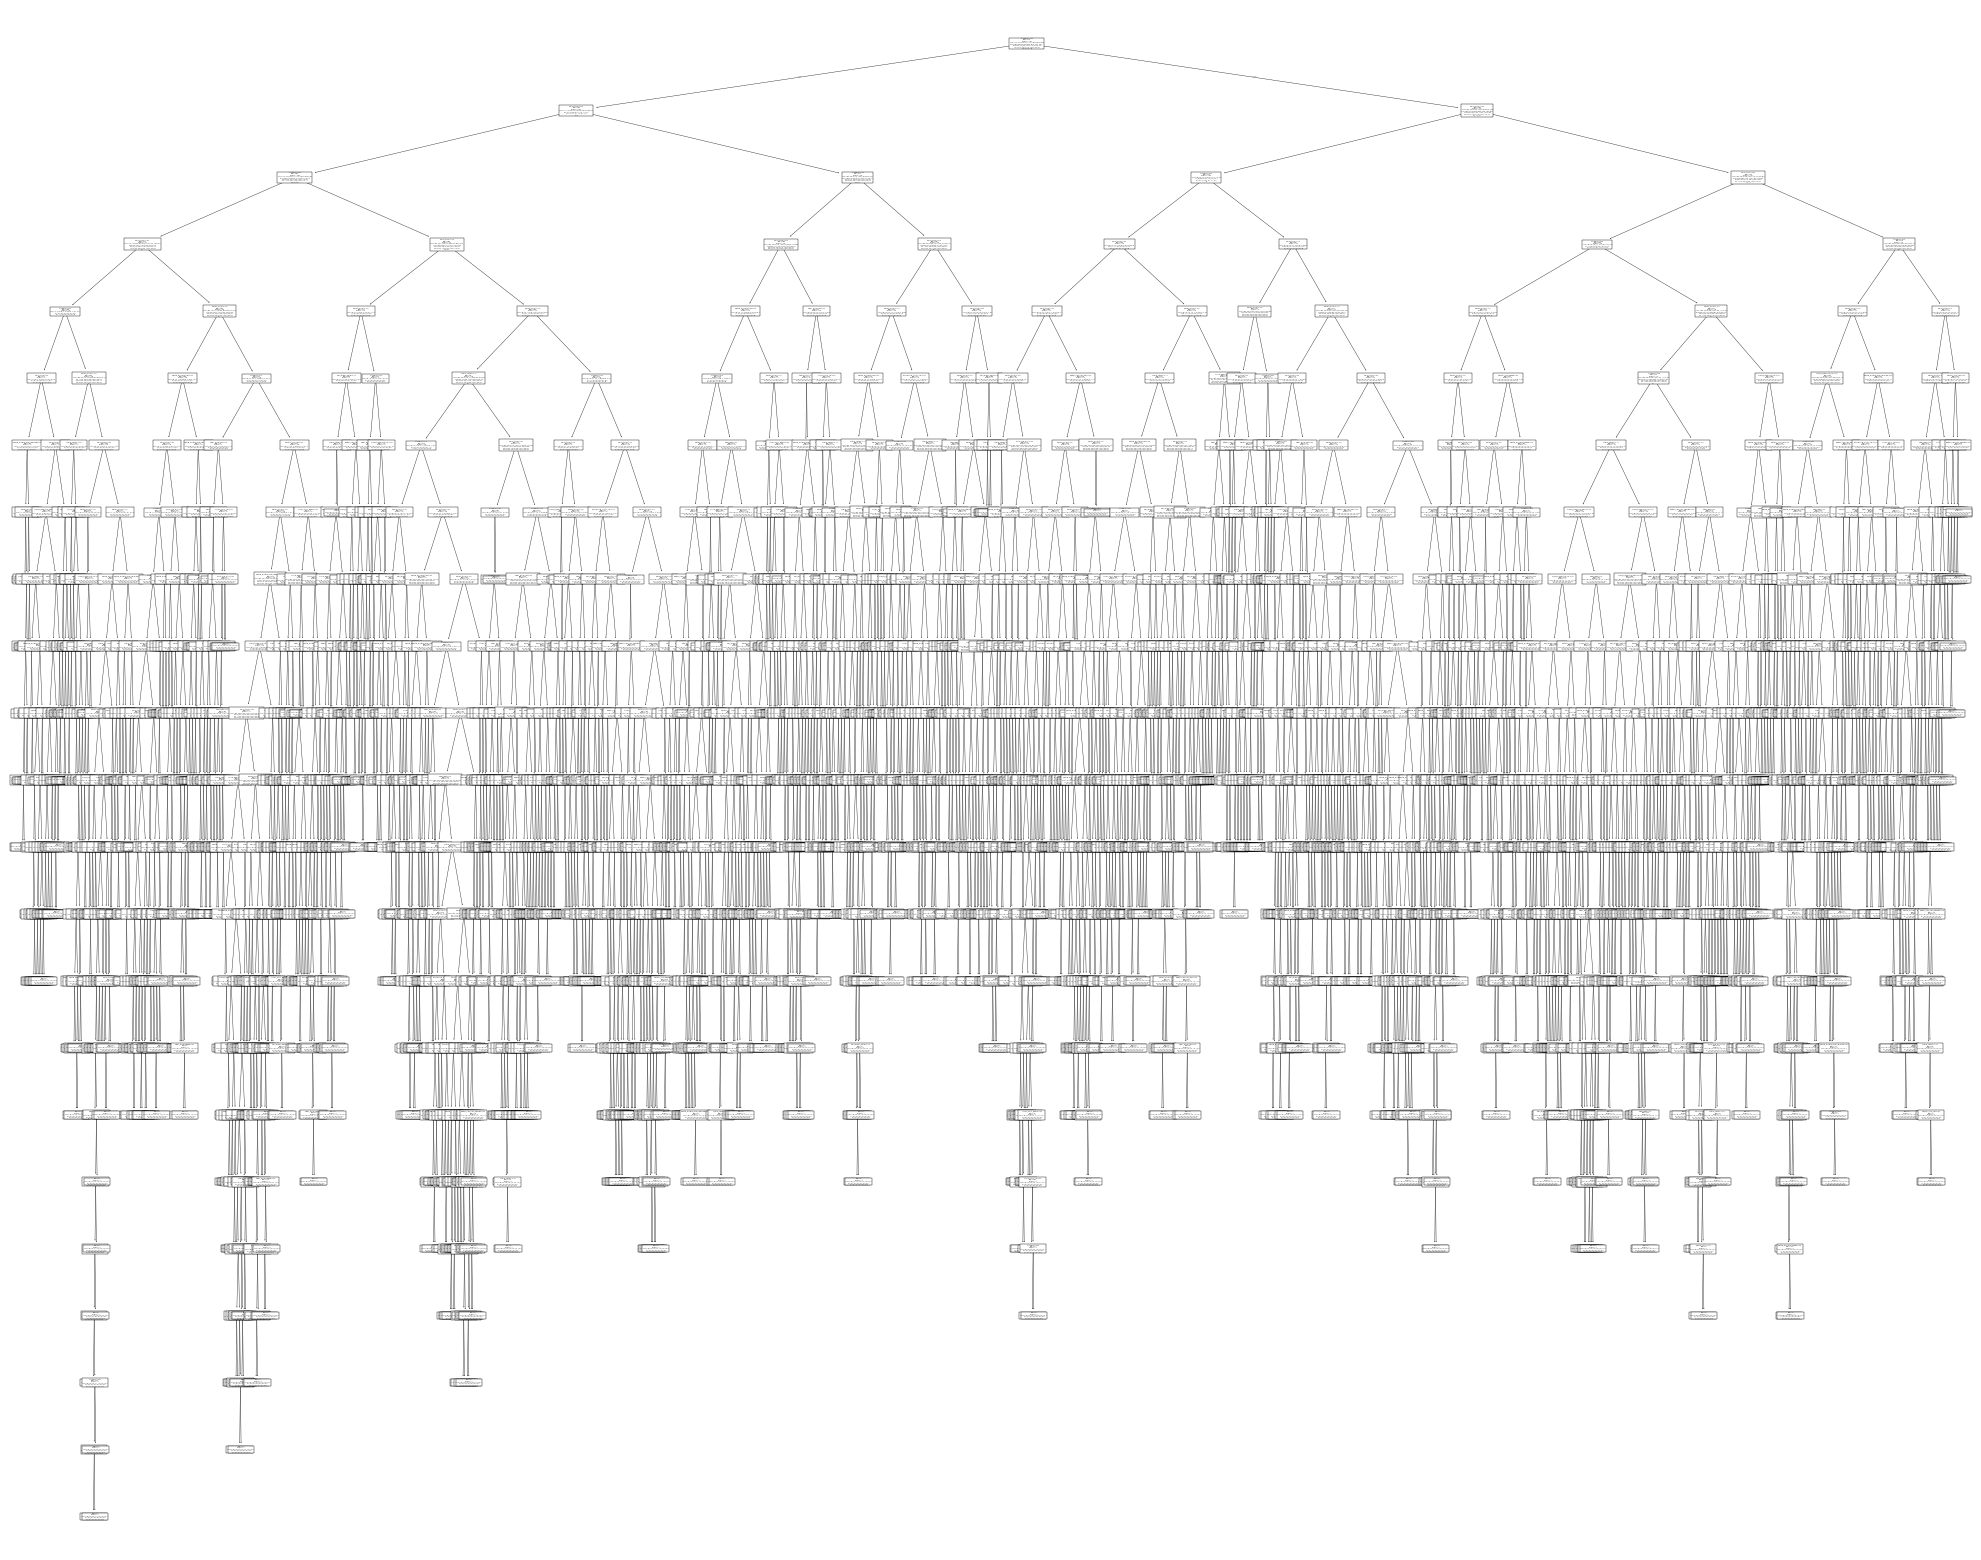

In [138]:



#gerando um plot tree
fig = plt.figure(figsize = (25,20))
tree.plot_tree(mdl_dt, feature_names = Xtrain.columns);

### Usando RandomFlorestClassifier

In [156]:
n_estimators = [10,30,100,500,1000]
max_features = ['auto', 'sqrt']
max_depth = [5,15,30,50]
#min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,5,10]
bootstrap = ['True','False']
class_weight = ['balanced', None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Relatório de classificação
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

        55.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         7
        59.0       0.00      0.00      0.00         8
        60.0       0.33      0.07      0.11        15
        61.0       0.30      0.41      0.35        29
        62.0       0.21      0.20      0.21        50
        63.0       0.26      0.16      0.19        77
        64.0       0.29      0.24      0.27        95
        65.0       0.21      0.27      0.24       132
        66.0       0.26      0.33      0.29       140
        67.0       0.16      0.23      0.19       109
        68.0       0.31      0.40      0.35       157
        69.0       0.32      0.25      0.28       139
        70.0       0.16      0.20      0.18       100
        71.0       0.33      0.21      0.26        86
        72.0       0.26      0.24      0.25

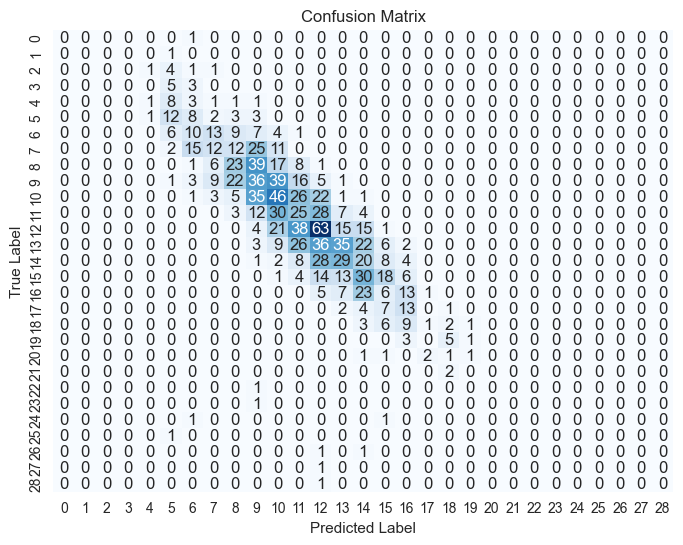

In [162]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão colorida
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Modelo 03 - LGBM

In [165]:
random_grid = {'num_leaves': [27, 30, 50, 80, 120, 170, 230, 300],
               'bagging_fraction': [0.5, 0.7, 0.8, 0.9],
              'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
              'boosting_type' : ['gbdt', 'dart'],
              'bagging_freq': [3, 9, 11, 15, 17, 23, 31],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'feature_fraction': [0.5, 0.7, 0.8, 0.9],
              'lambda_l1': [0, 10, 20, 30, 40],
               'class_weight': ['balanced',None]}

lgbm = LGBMClassifier()
lgbm_tuned = RandomizedSearchCV(estimator = lgbm,
                                param_distributions = random_grid,
                                n_iter = 100, cv = 2,
                                verbose=10, random_state=42, n_jobs = -1)
mdl_lgbm = lgbm_tuned.fit(Xtrain.to_numpy(), ytrain.to_numpy())
print(lgbm_tuned.best_params_)
ypred_lgbm = mdl_lgbm.predict(Xtest.to_numpy())

#Alimentando a tabela comparativa
mod = 'LGBM - Sem Balanceamento - Randomized Search CV'
df_comp = append_tab(ytest, ypred_lgbm)
display(df_comp)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=17, subsample_freq=0 will be ignored. Current value: bagging_freq=17
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=17, subsample_freq=0 will be ignored. Current value: bagging_freq=17
[LightGBM] [Info] Auto-choosing row-w

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### Interpretabilidade dos modelos

#### Feature Importances from Sklearn

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=17, subsample_freq=0 will be ignored. Current value: bagging_freq=17
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=17, subsample_freq=0 will be ignored. Current value: bagging_freq=17
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 secon

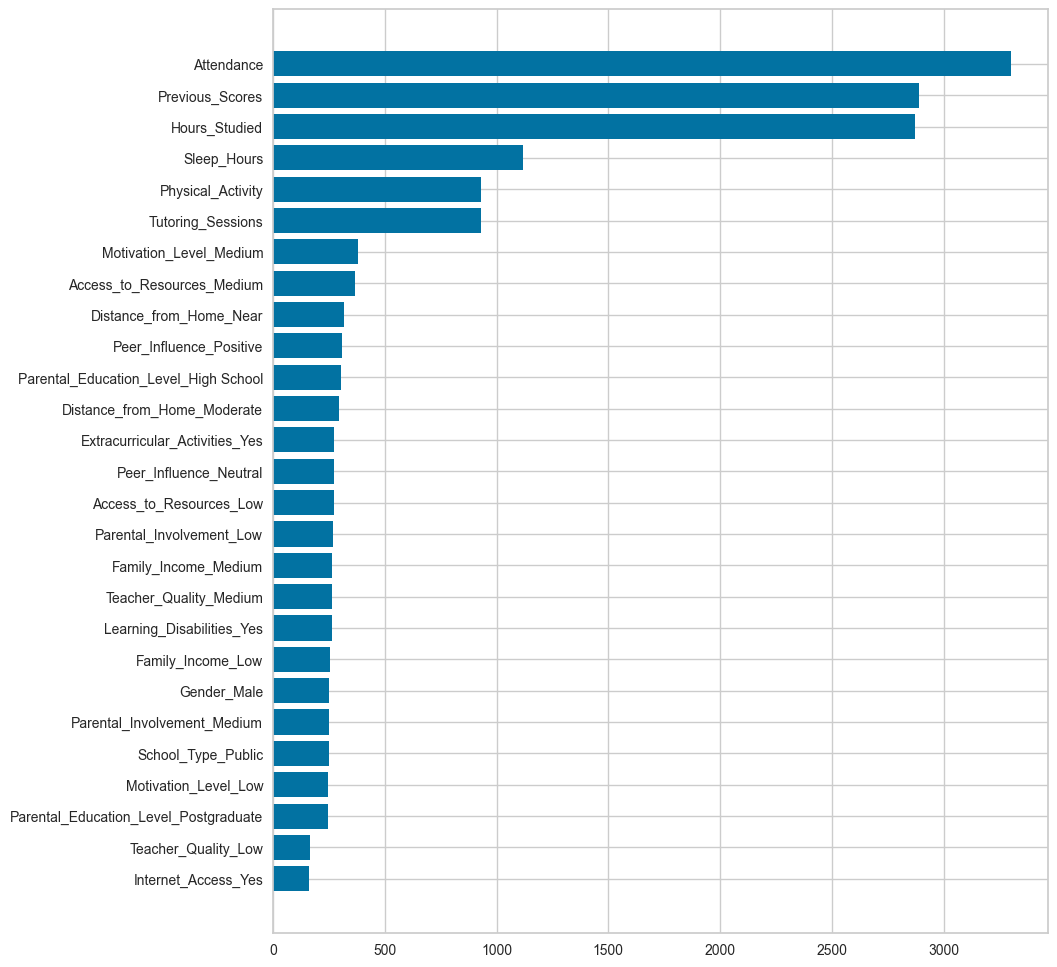

In [168]:
%%time
lgbm = LGBMClassifier(
                      num_leaves = 30,
                      max_depth =  11,
                      learning_rate = 0.3,
                      lambda_l1 = 0,
                      feature_fraction = 0.9,
                      class_weight = 'balanced',
                      boosting_type = 'dart',
                      bagging_freq = 17,
                      bagging_fraction = 0.9
                      )

mdl_lgbm = lgbm.fit(X_train.to_numpy(), y_train.to_numpy())
feat_importances = pd.DataFrame({'features' : X_train.columns,
                                 'importance': mdl_lgbm.feature_importances_}).sort_values('importance', ascending = True)
ypred = mdl_lgbm.predict(Xtest.to_numpy())

plt.figure(figsize=(10,12))
plt.barh(feat_importances.features, feat_importances.importance);

#### LIME

In [180]:
%%time
explainer =  shap.TreeExplainer(mdl_lgbm)
shap_values = explainer.shap_values(X_train.values)
shap.summary_plot(shap_values[1], X_train)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.